### Przygotowanie danych (biblioteki, import, czyszczenie z NaN, dodanie Seniority)

In [1]:
import matplotlib
print("Wersja Matplotlib:", matplotlib.__version__)

Wersja Matplotlib: 3.9.2


In [2]:
import seaborn
print("Wersja Seaborn:", seaborn.__version__)

Wersja Seaborn: 0.13.2


In [3]:
import seaborn as sns

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('HRDataset.csv')

In [9]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [10]:
df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
397,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
398,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
399,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [12]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [13]:
df.dropna(thresh=2,inplace=True)

<Axes: >

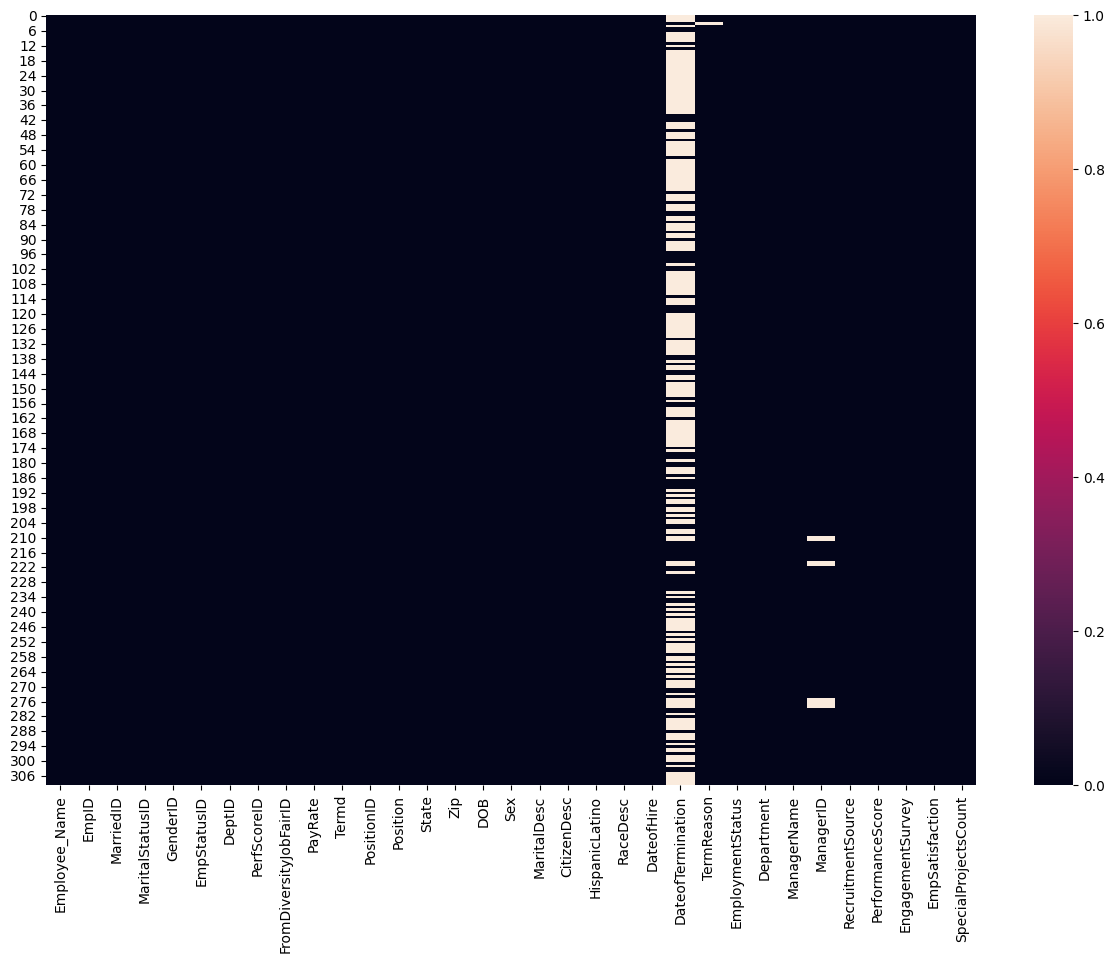

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [15]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [16]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [17]:
import datetime as dt

In [18]:
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019, 9, 27)
    else:
        end_date = row['DateofTermination']
    
    # Obliczenie różnicy czasu w dniach
    delta = end_date - row['DateofHire']
    
    # Obliczenie seniority w latach
    return delta / np.timedelta64(365, 'D')

In [19]:
# Zastosowanie funkcji do DataFrame
df['Seniority'] = df.apply(lambda row: count_seniority(row), axis=1)

In [20]:
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.923288
1,2014-01-06,NaT,5.726027
2,2014-09-29,NaT,4.997260
3,2015-02-16,2015-04-15,0.158904
4,2015-05-01,NaT,4.410959


### Zad 1

In [ ]:
#zad1: Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, 
#a oceną wydajności pracy (PerformanceScore)?

In [24]:
# Każdy z managerów ma pod sobą różną liczbę pracowników
df['ManagerName'].value_counts()

ManagerName
Michael Albert        22
Elijiah Gray          22
Kelley Spirea         22
Kissy Sullivan        22
Brannon Miller        21
Webster Butler        21
David Stanley         21
Amy Dunn              21
Ketsia Liebig         21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: count, dtype: int64

In [23]:
# Aby zobrazować rozkład wariantów PerformanceScore w ramach danego managera - obliczamy odpowienio procenty
percentage_distribution = (
    df.groupby('ManagerName')['PerformanceScore']
    .value_counts(normalize=True)
)
percentage_distribution

ManagerName         PerformanceScore 
Alex Sweetwater     Fully Meets          0.666667
                    Exceeds              0.222222
                    Needs Improvement    0.111111
Amy Dunn            Fully Meets          0.714286
                    Exceeds              0.142857
                    PIP                  0.095238
                    Needs Improvement    0.047619
Board of Directors  Fully Meets          1.000000
Brandon R. LeBlanc  Fully Meets          1.000000
Brannon Miller      Fully Meets          0.428571
                    Exceeds              0.333333
                    PIP                  0.190476
                    Needs Improvement    0.047619
Brian Champaigne    Fully Meets          1.000000
David Stanley       Fully Meets          0.904762
                    Exceeds              0.047619
                    Needs Improvement    0.047619
Debra Houlihan      Fully Meets          0.666667
                    Needs Improvement    0.333333
Elijiah Gray

In [25]:
# Przygotowanie danych do wykresu
percentage_distribution = (
    df.groupby('ManagerName')['PerformanceScore']
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100  # Zmiana struktury danych i konwersja na procenty
)

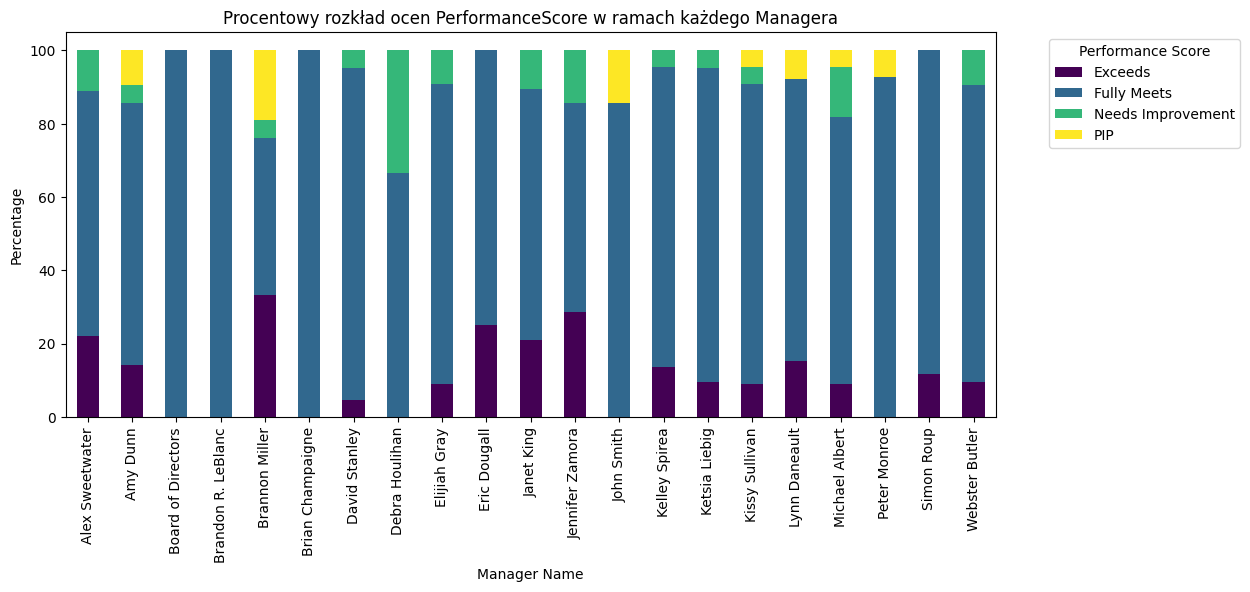

In [27]:
# Tworzenie skumulowanego wykresu słupkowego
percentage_distribution.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='viridis')

# Dostosowanie wykresu
plt.title('Procentowy rozkład ocen PerformanceScore w ramach każdego Managera')
plt.xlabel('Manager Name')
plt.ylabel('Percentage')
plt.legend(title='Performance Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### **Odp.** Jest pewna zależność, ale bez wyraźnej tendencji. Większość managerów przypisuje ocenę 'Fully Meets'. Przykładowo 5 z nich przydzieliło tylko taką ocenę wszystkim swoim pracownikom. 7 przypisało ocenę PIP (konieczność weryfikacji jej znaczenia). Na podstawie wykresu można ocenić, którzy managerowie chętniej wystawiali oceny 'Exceeds' lub 'Needs Improvement' (ale oceny te nigdy nie dominowały w ogólnej klasyfikacji per manager).

### Zad 2

In [28]:
#zad2: Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [29]:
df[['RecruitmentSource', 'Seniority']].head()

,RecruitmentSource,Seniority
0,Diversity Job Fair,10.923288
1,Website Banner Ads,5.726027
2,Internet Search,4.997260
3,Pay Per Click - Google,0.158904
4,Website Banner Ads,4.410959


In [33]:
# Grupa według RecruitmentSource i obliczanie średniej oraz liczby pracowników w danej grupie
mean = df.groupby('RecruitmentSource').agg(
    MeanSeniority=('Seniority', 'mean'),  # Średnia seniority
    Count=('Seniority', 'count')           # Liczba pracowników
).sort_values(by='MeanSeniority', ascending=False)

mean

,MeanSeniority,Count
RecruitmentSource,,
Careerbuilder,8.487671,1
Other,6.457534,9
Billboard,5.866781,16
MBTA ads,5.733441,17
Website Banner Ads,5.725395,13
Information Session,5.627397,4
Professional Society,5.441370,20
Employee Referral,5.029342,31
Pay Per Click - Google,5.012785,21


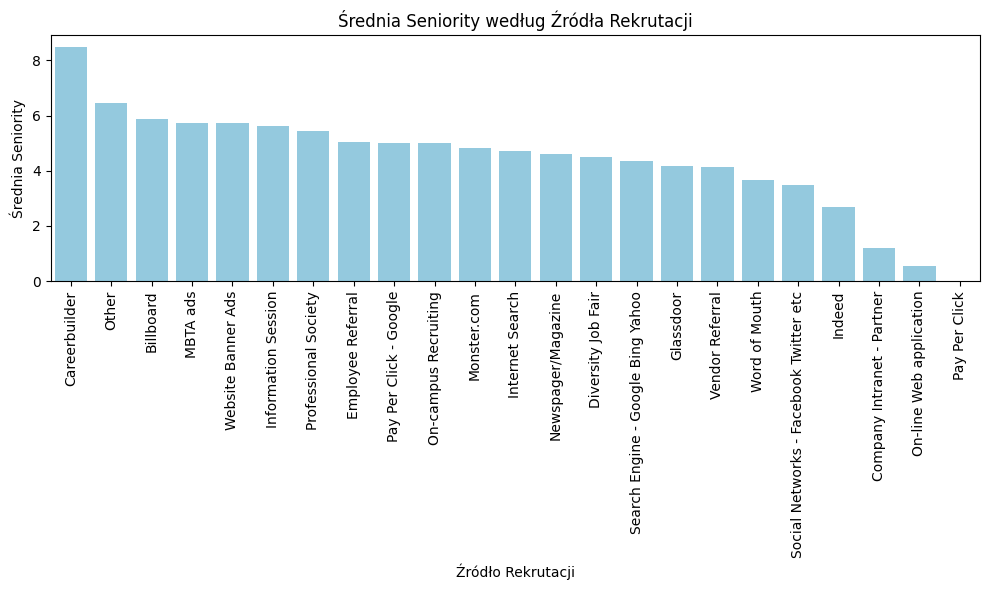

In [35]:
#jeżeli nie bralibyśmy pod uwagę liczności pracowników z najwyższym stażem, a tylko średnią to wyniki byłby następujące:
# Obliczanie średniej seniority dla każdego RecruitmentSource
mean_seniority = df.groupby('RecruitmentSource')['Seniority'].mean().reset_index()
# Zmiana nazwy kolumny na 'MeanSeniority'
mean_seniority.columns = ['RecruitmentSource', 'MeanSeniority']
# Sortowanie danych malejąco według MeanSeniority
mean_seniority = mean_seniority.sort_values(by='MeanSeniority', ascending=False)
# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_seniority, x='RecruitmentSource', y='MeanSeniority', color='skyblue')
# Dostosowanie wykresu
plt.title('Średnia Seniority według Źródła Rekrutacji')
plt.xlabel('Źródło Rekrutacji')
plt.ylabel('Średnia Seniority')

# Zmiana rozmiaru czcionki etykiet na osi X
plt.xticks(rotation=90, fontsize=10)  # Możesz dostosować wartość fontsize według potrzeb

plt.tight_layout()  # Dostosowuje układ
plt.show()

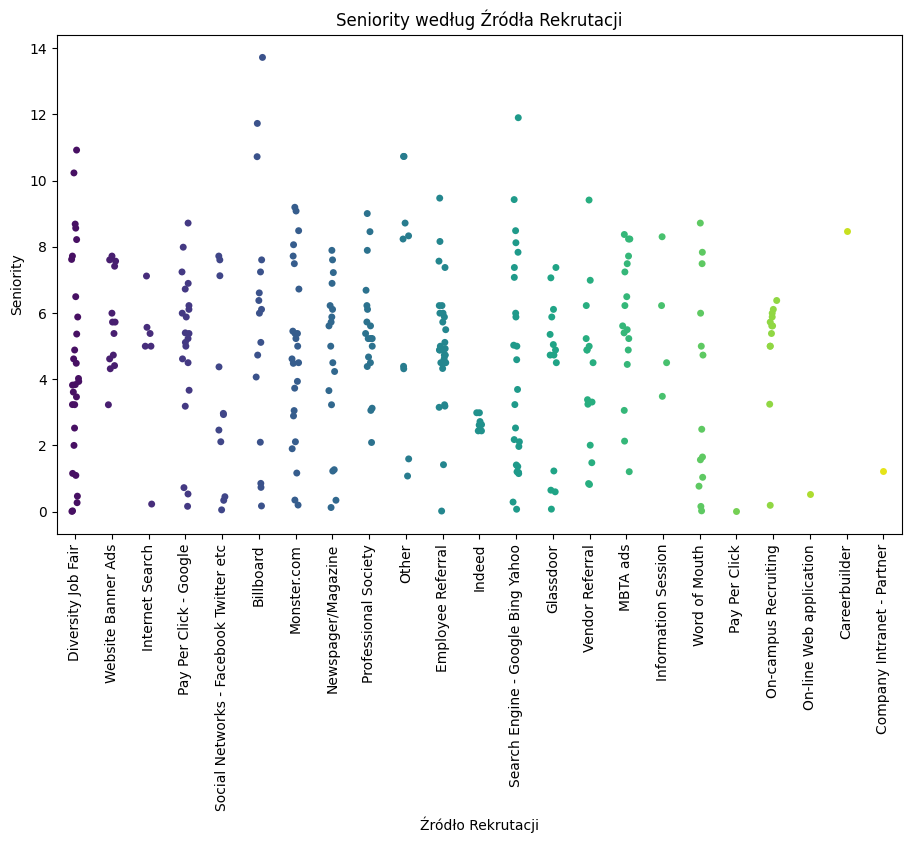

In [43]:
# Tworzenie wykresu punktowego
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='RecruitmentSource', y='Seniority', jitter=True,hue='RecruitmentSource', palette='viridis')

# Dostosowanie wykresu
plt.title('Seniority według Źródła Rekrutacji')
plt.xlabel('Źródło Rekrutacji')
plt.ylabel('Seniority')

# Wyświetlenie wykresu
plt.tight_layout()
# Obrót etykiet osi X o 45 stopni
plt.xticks(rotation=90)
plt.show()

In [ ]:
#jeżeli zależy nam na liczności grupy pracowników z najwyższym stażem to powinniśmy wziąć to pod uwagę

<Axes: xlabel='RecruitmentSource', ylabel='Seniority'>

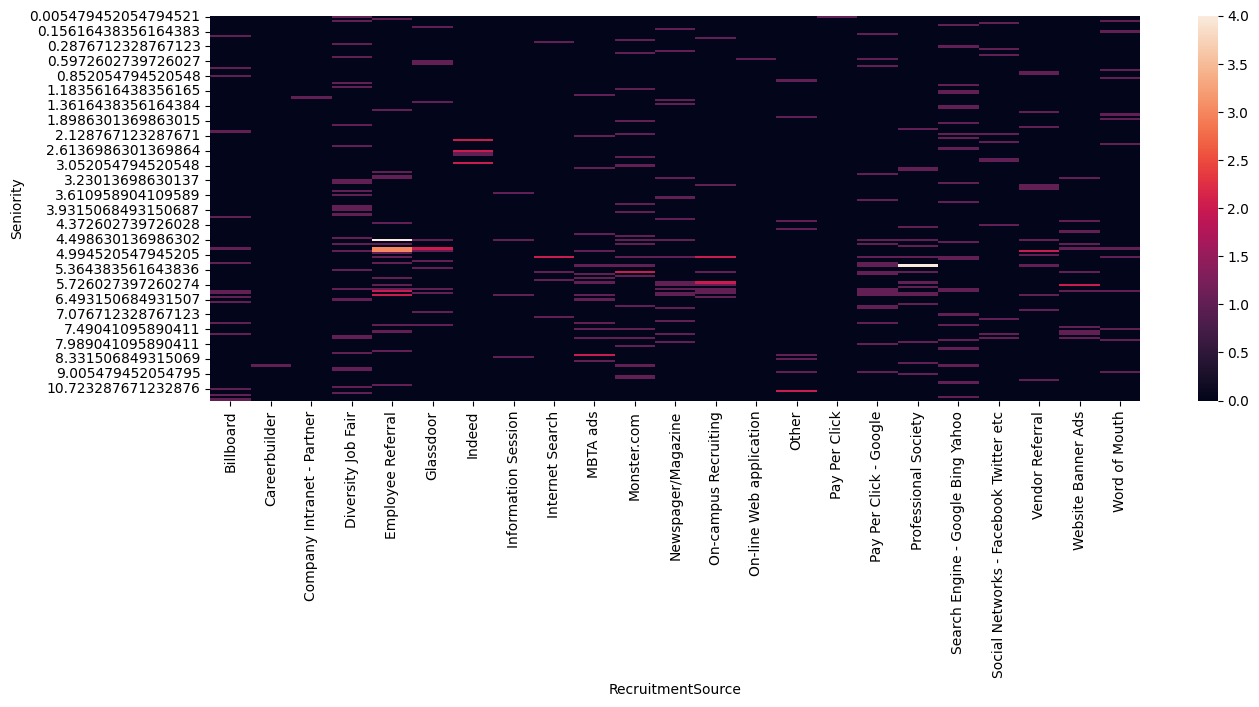

In [36]:
plt.figure(figsize=(15,5))
sns.heatmap(df.pivot_table(index=df['Seniority'],columns=df['RecruitmentSource'],values='EmpID',aggfunc='count').fillna(0))

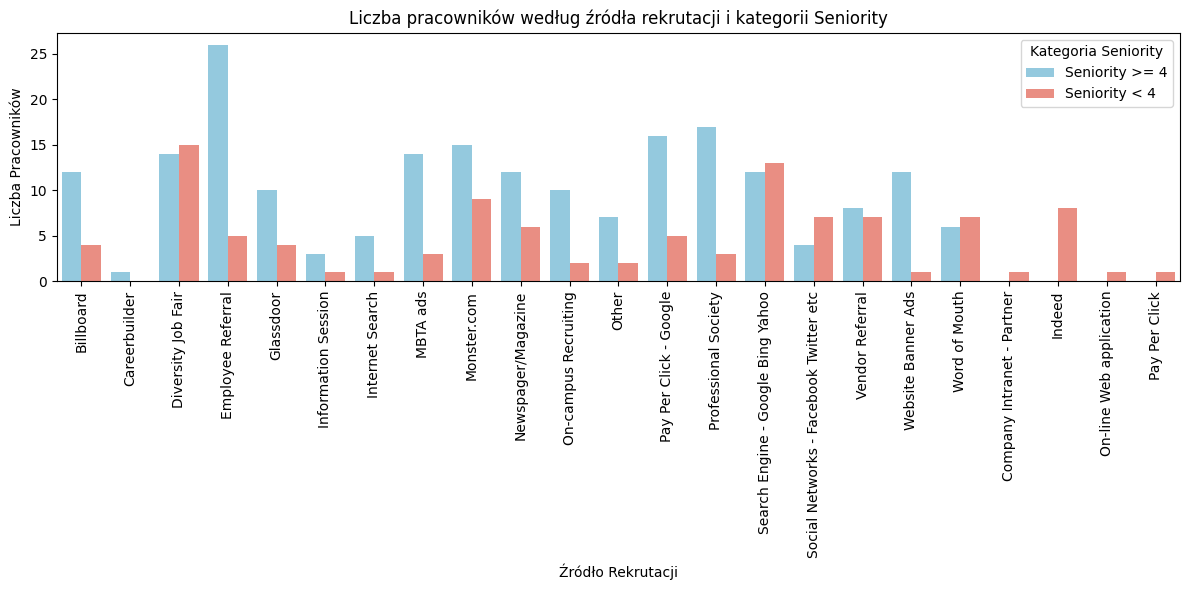

In [75]:
# Zliczanie danych według Seniority (ilość nie średnia) - zakładamy, że powyżej 4 lat to długi staż
filtered_df_powyzej = df[df['Seniority'] >= 4]
filtered_df_ponizej = df[df['Seniority'] < 4]

# Grupa według RecruitmentSource i obliczanie liczby pracowników
count_seniority_powyzej = filtered_df_powyzej.groupby('RecruitmentSource').agg(
    Count=('Seniority', 'count')
).reset_index()
count_seniority_powyzej['Category'] = 'Seniority >= 4'

count_seniority_ponizej = filtered_df_ponizej.groupby('RecruitmentSource').agg(
    Count=('Seniority', 'count')
).reset_index()
count_seniority_ponizej['Category'] = 'Seniority < 4'

# Połączenie danych w jeden DataFrame
combined_data = pd.concat([count_seniority_powyzej, count_seniority_ponizej])

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_data, x='RecruitmentSource', y='Count', hue='Category', palette=['skyblue', 'salmon'])

# Dostosowanie wykresu
plt.title('Liczba pracowników według źródła rekrutacji i kategorii Seniority')
plt.xlabel('Źródło Rekrutacji')
plt.ylabel('Liczba Pracowników')
plt.xticks(rotation=90)  # Rotacja etykiet na osi X dla lepszej czytelności
plt.legend(title='Kategoria Seniority')
plt.tight_layout()  # Dostosowuje układ
plt.show()


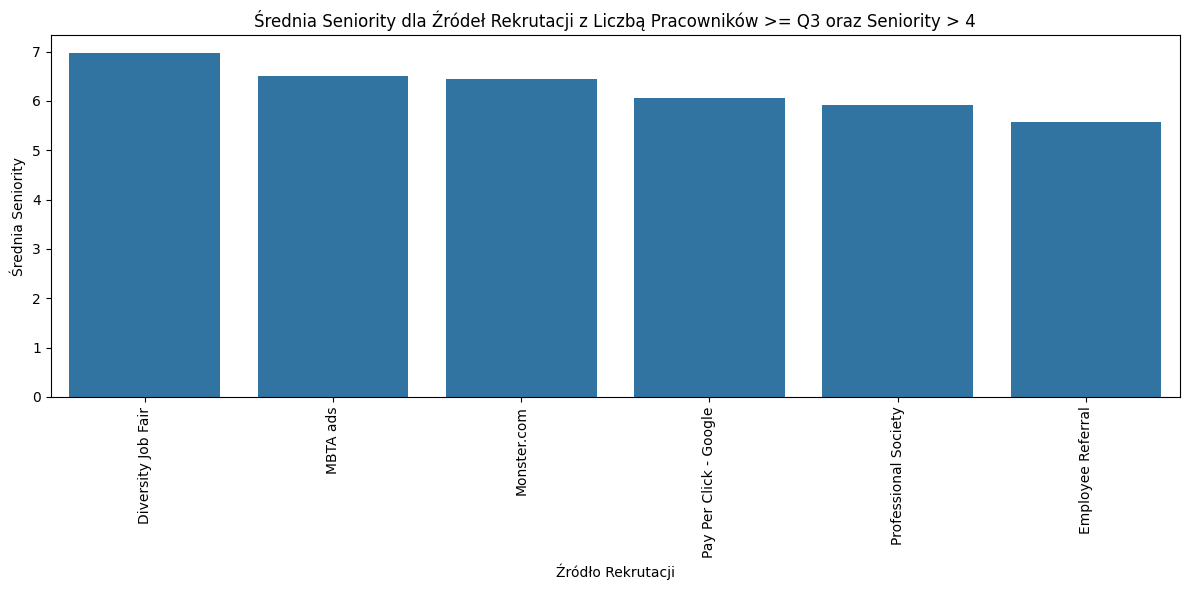

In [76]:
#warunki na liczność i seniority (jak wyglądają grupy)
# Filtracja danych, aby uwzględnić tylko te z Seniority > 4
filtered_df = df[df['Seniority'] > 4]

# Grupa według RecruitmentSource i obliczanie średniej oraz liczby pracowników
mean_count_seniority = filtered_df.groupby('RecruitmentSource').agg(
    MeanSeniority=('Seniority', 'mean'),  # Średnia seniority
    Count=('Seniority', 'count')           # Liczba pracowników
).sort_values(by='MeanSeniority', ascending=False)

# Obliczanie trzeciego kwartylu (Q3) dla Count
third_quartile = mean_count_seniority['Count'].quantile(0.75)

# Przefiltrowanie danych, aby uwzględnić tylko te, które mają Count >= Q3
filtered_data = mean_count_seniority[mean_count_seniority['Count'] >= third_quartile]

# Resetowanie indeksu
filtered_data = filtered_data.reset_index()

# Tworzenie wykresu słupkowego dla przefiltrowanych danych
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='RecruitmentSource', y='MeanSeniority')

# Dostosowanie wykresu
plt.title('Średnia Seniority dla Źródeł Rekrutacji z Liczbą Pracowników >= Q3 oraz Seniority > 4')
plt.xlabel('Źródło Rekrutacji')
plt.ylabel('Średnia Seniority')

# Zmiana rozmiaru czcionki etykiet na osi X
plt.xticks(rotation=90, fontsize=10)  # Możesz dostosować wartość fontsize według potrzeb

plt.tight_layout()  # Dostosowuje układ
plt.show()



#### **Odp.** Jeżeli bralibyśmy jedynie pod uwagę średni staż pracy (niezależnie od liczby pracowników w grupie) to top 3 źródła rekrutacji to: Careerbuilder (1 pracownik), Other (9 pracowników), Billboard (16 pracowników). Natomiast wykres punktowy czy heatmap pozwala ocenić rozproszenie punktów względem stażu pracy (różna liczba pracowników zrekrutowanych poprzez dane źródło). Wykresy słupkowe pozwalają ocenić jakie grupy względem długiego stażu pracy i źródła rekrutacji są najbardziej liczne. Reasumując - w mojej ocenie (wysoka liczba pracowników z długim stażem pracy w relacji do małej liczby pracownijów z krótkim stażem pracy) - najlepsze źródła rekrutacji to: Employee Referral, Prefessional Society, Pay Per Click - Google, Website Banner Adds, MBTA Adds.

### Zad 3

In [ ]:
#zad3: Czy stan cywilny (MaritalDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

In [77]:
df[['MaritalDesc','EmpSatisfaction']].head()

,MaritalDesc,EmpSatisfaction
0,Married,2.0
1,Divorced,4.0
2,Single,5.0
3,Married,3.0
4,Single,3.0


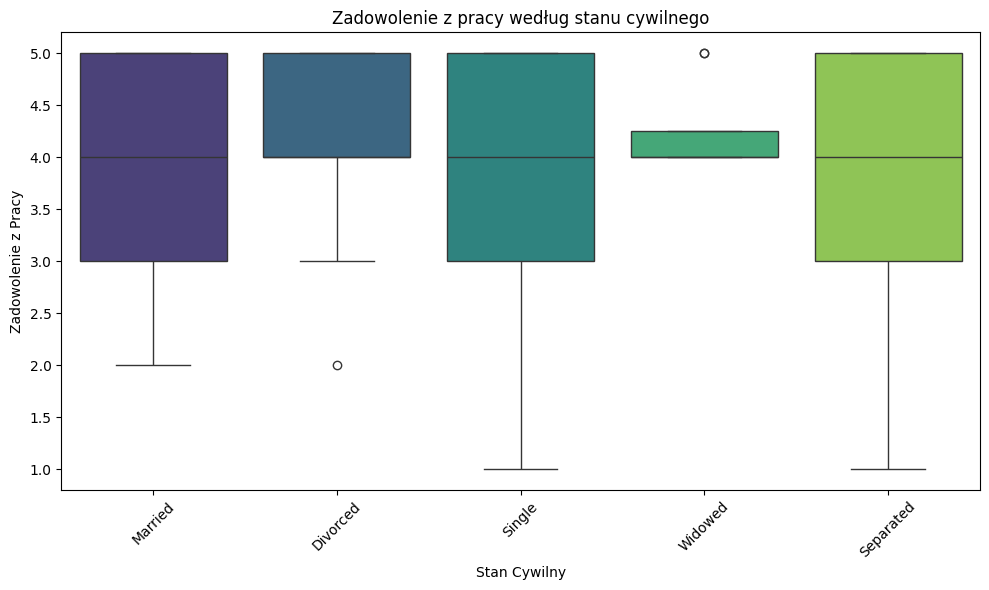

In [80]:
# Tworzenie wykresu pudełkowego
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MaritalDesc', y='EmpSatisfaction', hue= 'MaritalDesc', palette='viridis')

# Dostosowanie wykresu
plt.title('Zadowolenie z pracy według stanu cywilnego')
plt.xlabel('Stan Cywilny')
plt.ylabel('Zadowolenie z Pracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
pivot_table = df.pivot_table(index=df['MaritalDesc'],columns=df['EmpSatisfaction'],values='EmpID',aggfunc='count').fillna(0)
pivot_table

EmpSatisfaction,1.0,2.0,3.0,4.0,5.0
MaritalDesc,,,,,
Divorced,0.0,1.0,6.0,14.0,9.0
Married,0.0,5.0,54.0,31.0,33.0
Separated,1.0,0.0,4.0,2.0,5.0
Single,1.0,3.0,44.0,40.0,49.0
Widowed,0.0,0.0,0.0,6.0,2.0


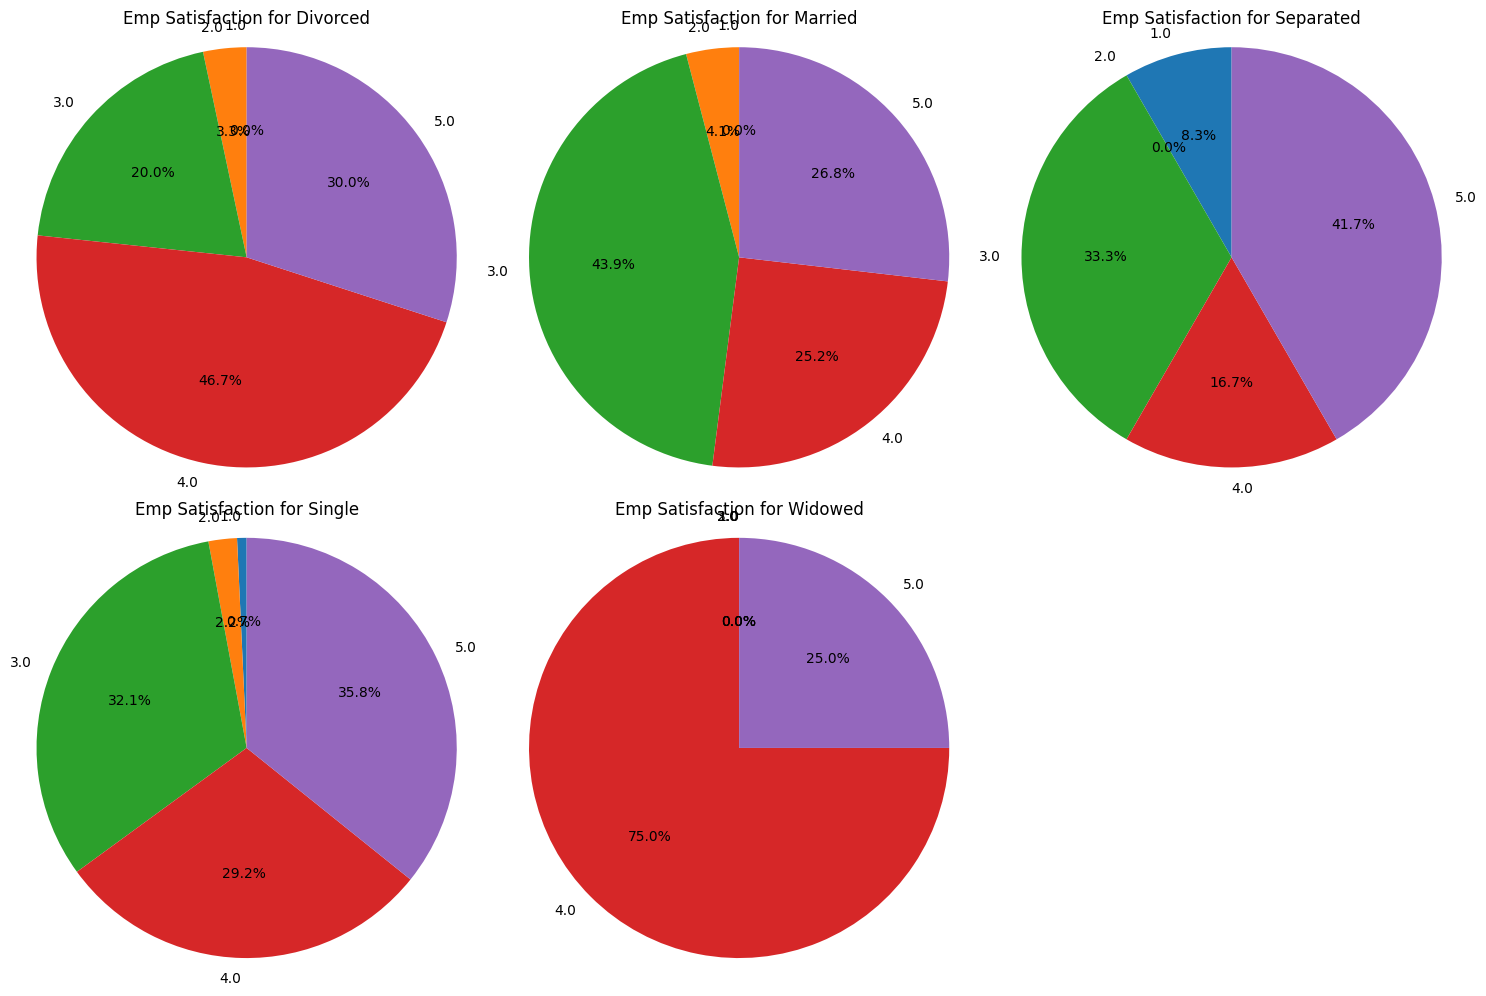

In [85]:
#wykresy kołowe per MaritalDesc

# Ustawienia rozmiaru wykresu
plt.figure(figsize=(15, 10))

# Iteracja przez każdą grupę stanu cywilnego
for i, marital_status in enumerate(pivot_table.index):
    plt.subplot(2, 3, i + 1)  # Ustawienie układu pod wykresy (2 wiersze, 3 kolumny)
    
    # Rysowanie wykresu kołowego dla danej grupy
    plt.pie(pivot_table.loc[marital_status], 
            labels=pivot_table.columns, 
            autopct='%1.1f%%', 
            startangle=90)
    
    # Dostosowanie wykresu
    plt.title(f'Emp Satisfaction for {marital_status}')
    plt.axis('equal')  # Równe osie dla okrągłego wykresu

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()


In [86]:
mean_emp_satisfaction = df.groupby('MaritalDesc')['EmpSatisfaction'].mean()
print(mean_emp_satisfaction)

MaritalDesc
Divorced     4.033333
Married      3.747967
Separated    3.833333
Single       3.970803
Widowed      4.250000
Name: EmpSatisfaction, dtype: float64


#### **Odp.** Pracownicy są raczej zadowoleni (większość ocen na 3 lub więcej). Ogólnie najbardziej zadowoleni są ci o statusie 'Widowed' (obserwacje odstające in plus), a następnie 'Divorced' (obserwacje odstające in minus). Satysfakcja dla 'Single' i 'Separated wydaje się być najbardziej zróżnicowana (zarówno bardzo zadowoleni jak i pojedyncze obserwacje - niezadowoleni). Ocena osób ze statusem 'Married' była najbardziej wyrównana (zdecydowanie njwięcej ocen 3).

### Zad 4

In [ ]:
#zad4: Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [99]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y', errors='coerce')
df['DOB'] = df['DOB'].apply(lambda x: x if x.year < 2020 else x.replace(year=x.year - 100))

In [106]:
df[['DOB', 'Employee_Name', 'DateofTermination', 'Termd']]

,DOB,Employee_Name,DateofTermination,Termd
0,1987-11-24,"Brown, Mia",NaT,0.0
1,1984-04-26,"LaRotonda, William",NaT,0.0
2,1986-09-01,"Steans, Tyrone",NaT,0.0
3,1985-09-16,"Howard, Estelle",2015-04-15,1.0
4,1988-05-19,"Singh, Nan",NaT,0.0
...,...,...,...,...
305,1952-01-18,"Daniele, Ann",NaT,0.0
306,1986-04-23,"Lajiri, Jyoti",NaT,0.0
307,1983-02-09,"Semizoglou, Jeremiah",NaT,0.0
308,1965-09-09,"South, Joe",NaT,0.0


In [101]:
# potrzebujemy kolumny z wiekiem
import datetime as dt

def count_age(row):
    end_date = dt.datetime(2019, 9, 27)
    age_days = (end_date - row['DOB']).days
    return age_days / 365.25  # Divide by the average days in a year

In [102]:
df['Age'] = df.apply(lambda row: count_age(row), axis=1)

In [109]:
df_active = df[df['Termd'] == 0]
df_active[['DOB', 'Age', 'Termd']]

,DOB,Age,Termd
0,1987-11-24,31.841205,0.0
1,1984-04-26,35.419576,0.0
2,1986-09-01,33.070500,0.0
4,1988-05-19,31.356605,0.0
7,1963-05-15,56.369610,0.0
...,...,...,...
305,1952-01-18,67.690623,0.0
306,1986-04-23,33.429158,0.0
307,1983-02-09,36.629706,0.0
308,1965-09-09,54.047912,0.0


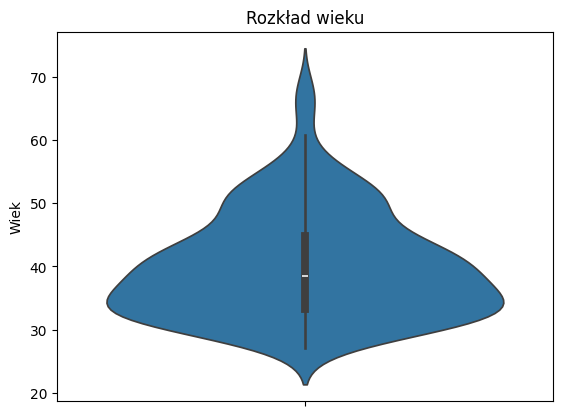

In [112]:
sns.violinplot(y='Age',data=df_active)
plt.title('Rozkład wieku')
plt.ylabel('Wiek')
plt.show()

#### **Odp.** Najwięcej jest osób między 30 a 40 rokiem życia.

### Zad 5

In [ ]:
#zad5: Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [118]:
df[['SpecialProjectsCount', 'Age']].head()

,SpecialProjectsCount,Age
0,6.0,31.841205
1,4.0,35.419576
2,5.0,33.070500
3,4.0,34.028747
4,5.0,31.356605


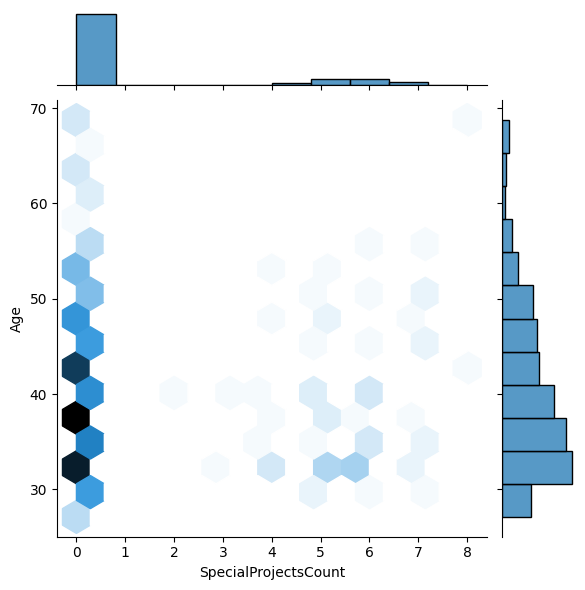

In [119]:
sns.jointplot(x='SpecialProjectsCount',y='Age',data=df,kind='hex')

#### **Odp.** Starsi pracownicy nie pracują nad większą ilością specialnych projekctów.